<H3> Assignment 30 - Tranform Iris Data Dimensions </H3>

<H4>In this assignment students have to transform iris data into 3 dimensions and plot a 3d
chart with transformed dimensions and color each data point with specific class. </H4>

<H5> Importing Libraries </H5>


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

<H3> Load dataset into Pandas DataFrame</H3>

In [78]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [79]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<H3> Standarize of Data  - Standardscaler is used to standardize</H3>

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
# Separating the features and storing in X 
X = df.iloc[:,:-1].values
# Separating out the target storing in y
y = df.iloc[:,4].values

In [82]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [47]:
X.shape

(150, 4)

<H3> Reducing the Dimension to 3d from 4 </H3> 

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)

In [63]:
# The dimension is reduced to 3. 
X_new.shape

(150, 3)

In [72]:
# Encoding the Target y values so that it be plotted in a scatter plot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl_y=LabelEncoder()
y=lbl_y.fit_transform(y)

In [73]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<H3> Visualise the data with colour datapoint with each specific class </H3>

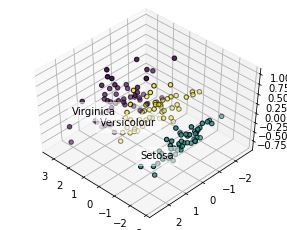

In [76]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_new[y == label, 0].mean(),
              X_new[y == label, 1].mean() + 1.5,
              X_new[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y,edgecolor='k')

plt.show()
